# 6 - Carga y preprocesamiento de datos (Ejercicios)

En este apartado, hemos estudiado uno de los componentes más importantes del ciclo de vida de los modelos de inteligencia artificial: la adquisición y manipulación de los datos. En los conjuntos de datos propuestos, tendremos por una parte la información relativa a los atributos de la muestra, y por otra los nombres de los mismos. Tu tarea será:

* Importar desde consola por comandos Linux los ficheros oportunos.
* Leer los ficheros `data` y `names`.
* Explorar el fichero `names` para analizar qué tipo de expresiones regulares necesitas para identificar los nombres de las columnas en la metadata.
* Aplicar las transformaciones *regex* pertinentes y obtener los nombres de las columnas para construir los datos. *Pista: El nombre de la variable respuesta tendremos que añadirlo al final ya que no viene explícitamente citado*.
* Realizar un conveniente preprocesmiento de las variables en función de su tipo. 

## 6.1 - *Adult* [dataset](https://archive.ics.uci.edu/ml/datasets/Adult)



En primer lugar, importamos todas las librerías necesarias para poder cargar y trabajar con estos dataframes.

In [10]:
import os
import re
import pandas as pd
import numpy as np
import requests

Importante! Tenemos que fijar un directorio de trabajo para poder importar correctamente todos los archivos. Al final del notebook, para que se guarde en nuestro repositorio de Github, volveremos a cambiar al directorio anterior.

In [12]:
os.chdir('c:\\Users\\estev\\OneDrive\\Escritorio\\Bootcamp_data\\temario\\Procesamiento_de_datos')


In [ ]:
Crearemos una carpeta para cada dataset que importemos. Aquí toca crear la primera carpeta. Movemos el directorio a esa localización.

In [14]:
# Creamos una carpeta para que contenga a nuestro dataset
!mkdir adult_dataset
# Movemos el directorio activo a esa localización
%cd adult_dataset


c:\Users\estev\OneDrive\Escritorio\Bootcamp_data\temario\Procesamiento_de_datos\adult_dataset


Ya existe el subdirectorio o el archivo adult_dataset.
c:\Users\estev\OneDrive\Escritorio\Bootcamp_data\entorno_bootcamp\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


Descargamos los archivos 'data' y 'names' directamente desde la URL y los guardamos en la nueva carpeta llamada 'adult_dataset'.

In [4]:
# Descargamos el fichero que contiene los datos a nuestro directorio activo
import requests

# URL del archivo
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

# Descargar el archivo
response = requests.get(url)

# Guardar el archivo en el disco
with open("adult.data", "wb") as file:
    file.write(response.content)

print("Archivo descargado correctamente.")

Archivo descargado correctamente.


In [5]:
# Descargamos el fichero que contiene los datos a nuestro directorio activo
import requests

# URL del archivo
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names"

# Descargar el archivo
response = requests.get(url)

# Guardar el archivo en el disco
with open("adult.names", "wb") as file:
    file.write(response.content)

print("Archivo descargado correctamente.")

Archivo descargado correctamente.


Abrimos los dos archivos y conseguimos crear un dataframe a partir de ellos. Para ello, hemos tenido que:

- Dividir $adult.data$ por saltos de línea.

- Dividir cada línea por comas y eliminar las líneas vacías. De este modo ya tenemos divididos los datos por columnas.

- Obtener los nombres de las columnas a partir de una función lambda de expresiones regulares que extrae los nombres de las columnas del archivo $adult.names$.

- Crear el data frame con los datos y los nombres de las columnas ya extraídos.

In [15]:

with open(os.path.join(os.getcwd(),'adult.data'),'r') as f:
    data = f.read().splitlines() # Dividimos el texto por saltos de línea
    data = [elem.split(',') for elem in data] # Dividimos cada línea por las comas y removemos líneas vacías
# Leemos metadata
with open(os.path.join(os.getcwd(),'adult.names'),'r') as f:
    metadata = f.read().splitlines()
# Regex
regex_fn = lambda text: re.findall('^[a-zA-Z-]+:{1}', text)
reg_text_fn = lambda text : re.findall('[a-zA-Z- ]+', text)
metadata_list = [regex_fn(elem)[0] for elem in metadata if regex_fn(elem)]
col_names = [reg_text_fn(elem)[0] for elem in metadata_list if reg_text_fn(elem)] + ['label']
# Construimos el objeto pd.DataFrame
df = pd.DataFrame(data=data, columns=col_names)

Hacemos un print de la base de datos ('df') para comprobar que hemos realizado correctamente los pasos anteriores.

In [24]:
df.head(56)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


Queremos averiguar la estructura de nuestro dataframe y qué tipo de datos tenemos. Para ello, aplicamos el método $df.info$. El resultado es sorprendente; no hay datos nulos y todos los tipos de datos son objetos. Esto puede ser debido a que los datos nulos, en vez de estar representados por NaNs, están representados por otros símbolos, como pueden ser los signos de interrogación. Para ello, hacemos un $df.head(100)$ con el fin cerciorarnos de que es esto lo que ocurre.

En efecto, en la columna 'Native country' encontramos varios valores nulos marcados con símbolos de interrogación. Los sustituímos utilizando una expresión regular que indique 

In [58]:
df.info()
df = df.replace(r'^\s*\?\s*$', np.nan, regex=True)
df.iloc[50:55,]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32562 entries, 0 to 32561
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32562 non-null  object
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  object
 3   education       32561 non-null  object
 4   education-num   32561 non-null  object
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  object
 11  capital-loss    32561 non-null  object
 12  hours-per-week  32561 non-null  object
 13  native-country  31978 non-null  object
 14  label           32561 non-null  object
dtypes: object(15)
memory usage: 3.7+ MB


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
50,25,Private,32275,Some-college,10,Married-civ-spouse,Exec-managerial,Wife,Other,Female,0,0,40,United-States,<=50K
51,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,NaN,<=50K
52,47,Private,51835,Prof-school,15,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,1902,60,Honduras,>50K
53,50,Federal-gov,251585,Bachelors,13,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,55,United-States,>50K
54,47,Self-emp-inc,109832,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,60,United-States,<=50K


In [28]:
missing_cols = list(df.isnull().sum(axis=0)[df.isnull().sum(axis=0)>0].index)
# Filtramos las filas donde hay algún dato nulo, y las columnas donde están
missing_cols

['workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'label']

In [29]:
df.loc[df.isnull().sum(axis=1)>0, missing_cols]

,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
32561,None,None,None,None,None,None,None,None,None,None,None,None,None,None


## 6.2 - Beijing Multi-Site [Air Quality Data](https://archive.ics.uci.edu/ml/datasets/Beijing+Multi-Site+Air-Quality+Data)

En este conjunto de datos no tendremos que hacer un esfuerzo muy grande en lo relativo a estudiar la *metadata*, pero exploraremos una serie de comandos de Linux que nos será muy útil conocer:

In [8]:
# Movemos el directorio activo a una nueva localización para este dataset
## Retrocedemos un nivel
%cd ..
## Creamos carpeta
!mkdir air_quality_dataset
## Movemos directorio activo
%cd air_quality_dataset
# Descargamos fichero comprimido


c:\Users\estev\OneDrive\Escritorio\Bootcamp_data\temario\Procesamiento_de_datos


c:\Users\estev\OneDrive\Escritorio\Bootcamp_data\entorno_bootcamp\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


c:\Users\estev\OneDrive\Escritorio\Bootcamp_data\temario\Procesamiento_de_datos\air_quality_dataset


In [9]:
import requests

# URL del archivo
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00501/PRSA2017_Data_20130301-20170228.zip"

# Descargar el archivo
response = requests.get(url)

# Guardar el archivo en el disco
with open("air_quality.zip", "wb") as file:
    file.write(response.content)


In [10]:

import zipfile

# Ruta del archivo ZIP
zip_file = "air_quality.zip"

# Directorio donde se descomprimirá (opcional, puedes cambiarlo si deseas)
output_dir = "./"

# Verificar si el archivo es un archivo ZIP y extraer su contenido
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(output_dir)

print("Archivo descomprimido correctamente.")

Archivo descomprimido correctamente.


In [11]:
import csv
import glob
directorio_csv = os.path.join(os.getcwd(), 'PRSA_Data_20130301-20170228')
csv_filas = [] # Iremos acumulando las filas del fichero en una lista
archivos_csv = glob.glob(os.path.join(directorio_csv, '*.csv'))
for archivo in archivos_csv:
    with open(archivo, newline='', encoding='utf-8') as File:
        reader = csv.reader(File)
        for row in reader:
            csv_filas.append(row)


In [12]:
import pandas as pd

# Convertir las filas a un DataFrame
df = pd.DataFrame(csv_filas).reset_index(drop=True)


In [13]:
type(df)

pandas.core.frame.DataFrame

In [14]:

# Mostrar las primeras filas del DataFrame
# print(df.head())
df.columns = df.iloc[0]

# 2. Eliminar la primera fila, ya que ahora es el encabezado
#df = df[1:]
print(df.head())


0  No  year  month  day  hour  PM2.5  PM10  SO2  NO2   CO  O3  TEMP    PRES  \
0  No  year  month  day  hour  PM2.5  PM10  SO2  NO2   CO  O3  TEMP    PRES   
1   1  2013      3    1     0      4     4    4    7  300  77  -0.7    1023   
2   2  2013      3    1     1      8     8    4    7  300  77  -1.1  1023.2   
3   3  2013      3    1     2      7     7    5   10  300  73  -1.1  1023.5   
4   4  2013      3    1     3      6     6   11   11  300  72  -1.4  1024.5   

0   DEWP  RAIN   wd  WSPM       station  
0   DEWP  RAIN   wd  WSPM       station  
1  -18.8     0  NNW   4.4  Aotizhongxin  
2  -18.2     0    N   4.7  Aotizhongxin  
3  -18.2     0  NNW   5.6  Aotizhongxin  
4  -19.4     0   NW   3.1  Aotizhongxin  


Ahora te toca, ¿eres capaz de leer todos los `csv`, concatenarlos y construir un `pd.DataFrame` en una sola línea de código?


```python
df = pd.concat([pd.read_csv(elem) for elem in os.listdir()]).reset_index(drop=True)
```

In [15]:
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
1,1,2013,3,1,0,4,4,4,7,300,77,-0.7,1023,-18.8,0,NNW,4.4,Aotizhongxin
2,2,2013,3,1,1,8,8,4,7,300,77,-1.1,1023.2,-18.2,0,N,4.7,Aotizhongxin
3,3,2013,3,1,2,7,7,5,10,300,73,-1.1,1023.5,-18.2,0,NNW,5.6,Aotizhongxin
4,4,2013,3,1,3,6,6,11,11,300,72,-1.4,1024.5,-19.4,0,NW,3.1,Aotizhongxin


## 6.3 - Solar flare [dataset](https://archive.ics.uci.edu/ml/datasets/Solar+Flare)

En este conjunto de datos, tendremos dos ficheros relativos a `data`, cuya primera fila serán las especificaciones temporales, por lo que deberemos quitarla, y además en los registros de datos las variables no vienen delimitadas por `','`, si no por espacios en blanco:

In [17]:
# Movemos el directorio activo a una nueva localización para este dataset
## Retrocedemos dos niveles
%cd ..


c:\Users\estev\OneDrive\Escritorio\Bootcamp_data\temario\Procesamiento_de_datos


c:\Users\estev\OneDrive\Escritorio\Bootcamp_data\entorno_bootcamp\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [19]:

## Creamos carpeta
!mkdir solar_flare_dataset
## Movemos directorio activo
%cd solar_flare_dataset


c:\Users\estev\OneDrive\Escritorio\Bootcamp_data\temario\Procesamiento_de_datos\solar_flare_dataset


In [20]:

# Descargamos los ficheros que contienen los datos a nuestro directorio activo
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/solar-flare/flare.data1
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/solar-flare/flare.data2
# Descargamos la metadata asociada al conjunto de datos
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/solar-flare/flare.names



"wget" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"wget" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"wget" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [21]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/solar-flare/flare.data1"

# Descargar el archivo
response = requests.get(url)

# Guardar el archivo en el disco
with open("flare.data1", "wb") as file:
    file.write(response.content)


url = "https://archive.ics.uci.edu/ml/machine-learning-databases/solar-flare/flare.data2"

# Descargar el archivo
response = requests.get(url)

# Guardar el archivo en el disco
with open("flare.data2", "wb") as file:
    file.write(response.content)


url = "https://archive.ics.uci.edu/ml/machine-learning-databases/solar-flare/flare.names"

# Descargar el archivo
response = requests.get(url)

# Guardar el archivo en el disco
with open("flare.names", "wb") as file:
    file.write(response.content)

In [22]:

# Leemos datos
## Leemos primer fichero de datos
with open(os.path.join(os.getcwd(),'flare.data1'),'r') as f:
    data1 = f.read().splitlines() # Dividimos el texto por saltos de línea
    data1 = [elem.split(' ') for elem in data1 if elem!=''] # Dividimos cada línea por las comas y removemos líneas vacías
    data1 = data1[1:] # Quitamos la línea de metadata temporal
## Leemos segundo fichero de datos
with open(os.path.join(os.getcwd(),'flare.data2'),'r') as f:
    data2 = f.read().splitlines() # Dividimos el texto por saltos de línea
    data2 = [elem.split(' ') for elem in data2 if elem!=''] # Dividimos cada línea por las comas y removemos líneas vacías
    data2 = data2[1:] # Quitamos la línea de metadata temporal
## Combinamos ambas listas
data = data1+data2


In [23]:

# Leemos metadata
with open(os.path.join(os.getcwd(),'flare.names'),'r') as f:
    metadata = f.read().splitlines()
    


In [24]:
## Regex
regex_fn = lambda text: re.findall('^\s+[0-9]+\.{1}\s{1}[a-zA-Z- ]+', text)
reg_text_fn = lambda text : re.findall('[a-zA-Z-]+', text)
metadata_list = [regex_fn(elem)[0].strip() for elem in metadata if regex_fn(elem)]
col_names = [reg_text_fn(elem)[0] for elem in metadata_list if reg_text_fn(elem)]
# Construimos el objeto pd.DataFrame
df = pd.DataFrame(data=data, columns=col_names)

In [30]:
df.columns = ['Code A', 'Code B', 'Code C', 'Activity', 'Evolution', 'Previous', 'Historically-complex', 'Did', 'Area 1', 'Area 2', 'C-class', 'M-class', 'X-class']
df

,Code A,Code B,Code C,Activity,Evolution,Previous,Historically-complex,Did,Area 1,Area 2,C-class,M-class,X-class
0,C,S,O,1,2,1,1,2,1,2,0,0,0
1,D,S,O,1,3,1,1,2,1,2,0,0,0
2,C,S,O,1,3,1,1,2,1,1,0,0,0
3,D,S,O,1,3,1,1,2,1,2,0,0,0
4,D,A,O,1,3,1,1,2,1,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384,H,S,X,1,2,1,1,1,1,1,0,0,0
1385,H,S,X,2,2,1,1,2,1,1,0,0,0
1386,C,S,O,1,2,1,2,2,1,1,0,0,0
1387,H,R,X,1,2,1,1,2,1,1,0,0,0


In [71]:
# Aquí estamos utilizando zip() para combinar los valores únicos de la columna 'Code A' con un rango de números. 
# el rango va desde 0 hasta el número total de valores únicos menos 1.
label2idx = {k:v for k,v in zip(df['Code A'].unique(), range(df['Code A'].nunique()))}
# Mapeamos el diccionario a la columna en cuestión
df['Code A'] = df['Code A'].map(label2idx)

label2idx = {k:v for k,v in zip(df['Code B'].unique(), range(df['Code B'].nunique()))}
# Mapeamos el diccionario a la columna en cuestión
df['Code B'] = df['Code B'].map(label2idx)

label2idx = {k:v for k,v in zip(df['Code C'].unique(), range(df['Code C'].nunique()))}
# Mapeamos el diccionario a la columna en cuestión
df['Code C'] = df['Code C'].map(label2idx)

# Mostramos resultados
df.head()
label2idx

array([0, 1, 2, 3, 4, 5])

In [ ]:

label2idx = {k:v for k,v in zip(df['Code B'].unique(), range(df['Code B'].nunique()))}
# Mapeamos el diccionario a la columna en cuestión
df['Code B'] = df['Code B'].map(label2idx)

label2idx = {k:v for k,v in zip(df['Code C'].unique(), range(df['Code C'].nunique()))}
# Mapeamos el diccionario a la columna en cuestión
df['Code C'] = df['Code C'].map(label2idx)

# Mostramos resultados
df.head()
label2idx

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1389 entries, 0 to 1388
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Code A                1389 non-null   object
 1   Code B                1389 non-null   object
 2   Code C                1389 non-null   object
 3   Activity              1389 non-null   object
 4   Evolution             1389 non-null   object
 5   Previous              1389 non-null   object
 6   Historically-complex  1389 non-null   object
 7   Did                   1389 non-null   object
 8   Area 1                1389 non-null   object
 9   Area 2                1389 non-null   object
 10  C-class               1389 non-null   object
 11  M-class               1389 non-null   object
 12  X-class               1389 non-null   object
dtypes: object(13)
memory usage: 141.2+ KB


<Axes: >

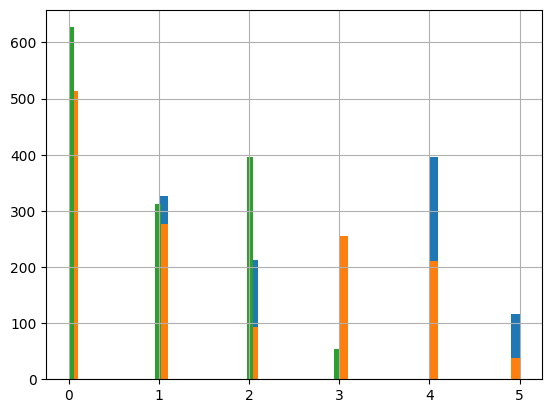

In [72]:
df['Code A'].hist(bins=50)
df['Code B'].hist(bins=50)
df['Code C'].hist(bins=50)

<Axes: >

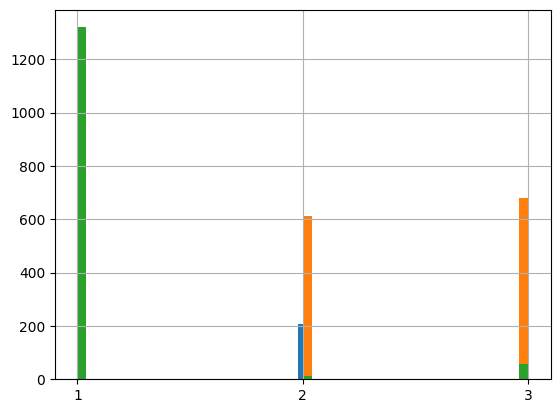

In [73]:
df['Activity'].hist(bins=50)
df['Evolution'].hist(bins=50)
df['Previous'].hist(bins=50)

<Axes: >

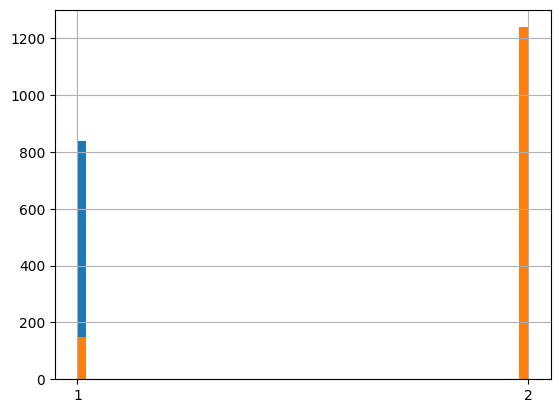

In [74]:
df['Historically-complex'].hist(bins=50)
df['Did'].hist(bins=50)


<Axes: >

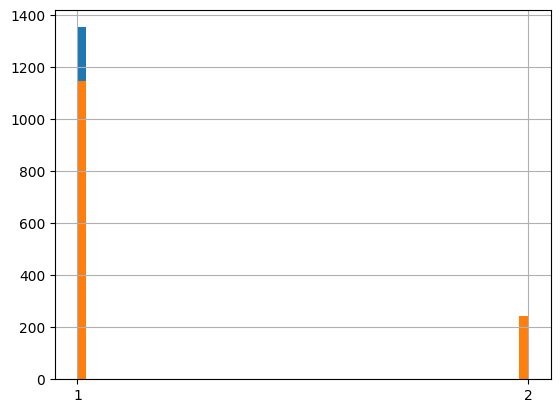

In [75]:
df['Area 1'].hist(bins=50)
df['Area 2'].hist(bins=50)

<Axes: >

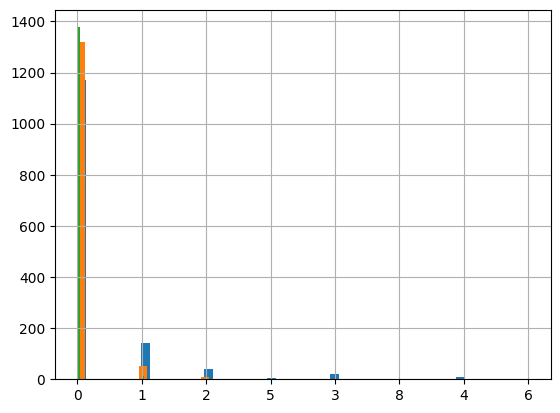

In [76]:
df['C-class'].hist(bins=50)
df['M-class'].hist(bins=50)
df['X-class'].hist(bins=50)

In [9]:
os.chdir('c:\\Users\\estev\\OneDrive\\Documentos\\GitHub\\Pre_procesamiento_de_datos')

NameError: name 'getwd' is not defined